<a href="https://colab.research.google.com/github/shivamswarnkar/Image-Classifier/blob/master/MNIST_classifier_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Downloading Data

In [0]:
# download data and load it
from torchvision import datasets, transforms

# a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5, )),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Util functions

In [0]:
# util function to display image next to predicted probabilities
def view_classify(img, ps, actual_digit=None):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Digit vs Predicted Probabilities')
  ax1.imshow(img.view(1,28,28).squeeze(), cmap="Greys_r")
  ax1.title.set_text(f'Actual Digit={actual_digit}')
  ax2.barh(range(10), ps.numpy().squeeze())

# Training

In [44]:
# define NN
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

# define criterion (for loss)
criterion = nn.NLLLoss()

# define optimizer (using Stoch Gradient desc. for this)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# hypter params
epochs = 25


# train
for epoch in range(epochs):
  running_loss = 0
  
  # go through each batch
  for images, labels in trainloader:
    # flatten the image
    images = images.view(images.shape[0], -1)
    
    # training pass
    optimizer.zero_grad()
    loss = criterion(model(images), labels)
    
    
    # backprop
    loss.backward()
    
    # update weight
    optimizer.step()
    
    # add total loss
    running_loss += loss.item()
  
  else:
    print(f'Training loss: {running_loss/len(trainloader)}')

Training loss: 1.4035405133769456
Training loss: 0.4334237770612306
Training loss: 0.34427017808310006
Training loss: 0.30041993357765395
Training loss: 0.2667970632645748
Training loss: 0.23591750099667227
Training loss: 0.20950685413693315
Training loss: 0.18771494509600628
Training loss: 0.16865022907823896
Training loss: 0.15299064933316414
Training loss: 0.14001078420340507
Training loss: 0.1289814652513657
Training loss: 0.11881382047716997
Training loss: 0.11044942059798409
Training loss: 0.10182370058000723
Training loss: 0.09491732804331063
Training loss: 0.08824124893765332
Training loss: 0.08305915703238455
Training loss: 0.0773864933160513
Training loss: 0.072711419866188
Training loss: 0.06828166207652102
Training loss: 0.0640430528122479
Training loss: 0.060499298213514435
Training loss: 0.05706844845218763
Training loss: 0.05357971683398747


# Testing How it did

### Plot Digit vs Predicted Probabilities

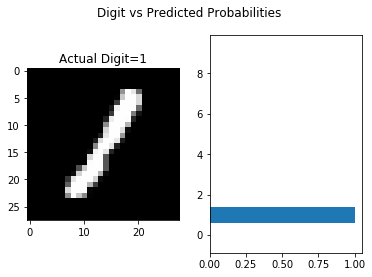

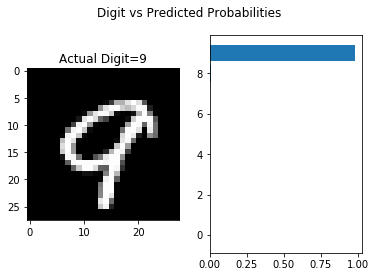

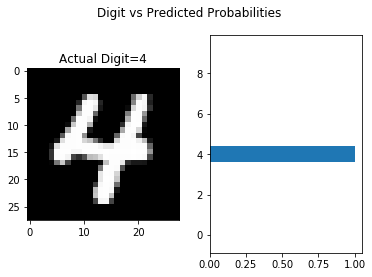

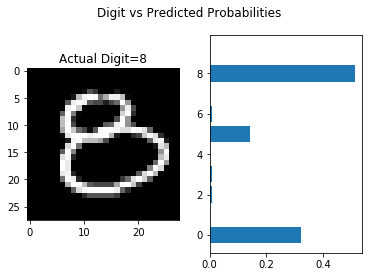

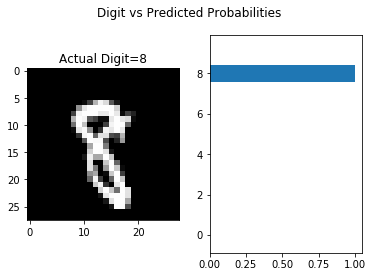

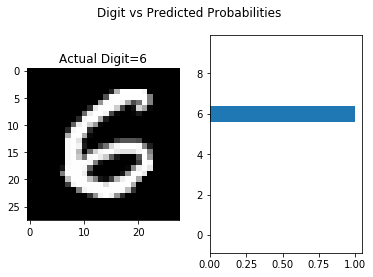

In [117]:
to_display = 5
with torch.no_grad():
  for images, labels in trainloader:
    # flatten image
    ps = torch.exp(model(images.view(images.shape[0], -1)))
    _, predicted_labels = ps.max(dim=1)
    for i in range(len(predicted_labels)):
      to_display -=1
      view_classify(images[i].view(1,28,28), ps[i], actual_digit=labels[i])
      if to_display < 0:
        break
    break

### Calculate Accuracy

In [104]:
wrong_classified = 0
with torch.no_grad():
  for images, labels in trainloader:
    # flatten image
    _, predicted_labels = torch.exp(model(images.view(images.shape[0], -1))).max(dim=1)
    wrong_classified += len((labels-predicted_labels).nonzero())

Model Accuracy:0.9875066631130064


In [111]:
print(f'Model Accuracy:{round(100-(wrong_classified/(64*len(trainloader)))*100, 3)}%')
print(f'Total Wrong classified: {wrong_classified}')

Model Accuracy:98.751%
Total Wrong classified: 750


### Plot Wrongly Classified Examples

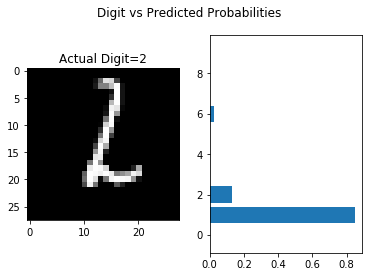

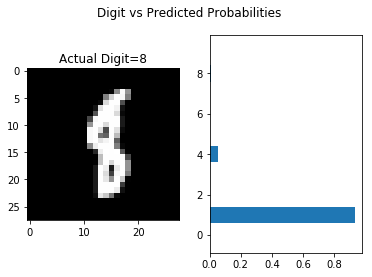

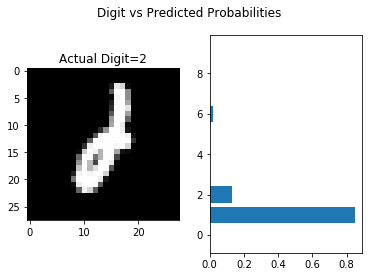

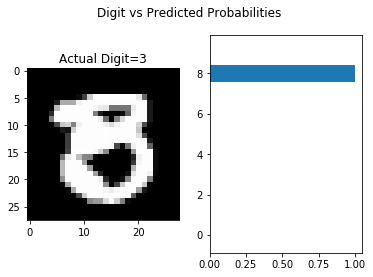

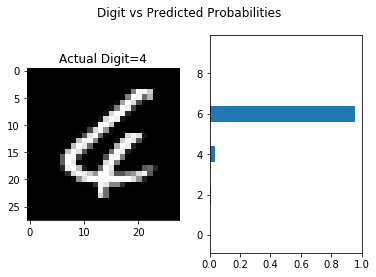

In [112]:
to_display = 5
with torch.no_grad():
  for images, labels in trainloader:
    # flatten image
    ps = torch.exp(model(images.view(images.shape[0], -1)))
    _, predicted_labels = ps.max(dim=1)
    for i in range(len(predicted_labels)):
      if(predicted_labels[i] != labels[i] and to_display > 0):
        to_display -=1
        view_classify(images[i].view(1,28,28), ps[i], actual_digit=labels[i])
      if to_display < 0:
        break

### Todo - Split Train/Test data, Try to increase accuracy. 